# Packages

In [3]:
import zipfile
import os
import random
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import imageio
from skimage.filters import threshold_otsu
import cv2

# Mount and Load Dataset

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# open zip file
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Springboard - Capstone 3/rawData.zip', 'r')

# create folder with raw data
zip_ref.extractall('/content/BloodCellData')
zip_ref.close()

In [6]:
# Train Data Directory
Train_datadir = '../content/BloodCellData/Data/Train'
Test_datadir = '../content/BloodCellData/Data/Test'

print("Train Directory Folders:", os.listdir(Train_datadir))
print("Test Directory Folders:", os.listdir(Test_datadir))

# Cell Type Catagories
cellTypes = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

Train Directory Folders: ['NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL']
Test Directory Folders: ['NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL']


# Collect, Convert Images to Arrays, Create DataFrame

In [7]:
# Train Data
img_id = []
img_array = []
img_label = []

# Folders also represent the cell type catagory
for folder in cellTypes:
  dir = os.path.join(Train_datadir, folder)
  for img in os.listdir(dir):
    img_path = os.path.join(dir, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    
    img_id.append(img)
    img_array.append(img_arr)
    img_label.append(folder)

In [8]:
print(len(img_id))
print(len(img_array))
print(len(img_label))

9957
9957
9957


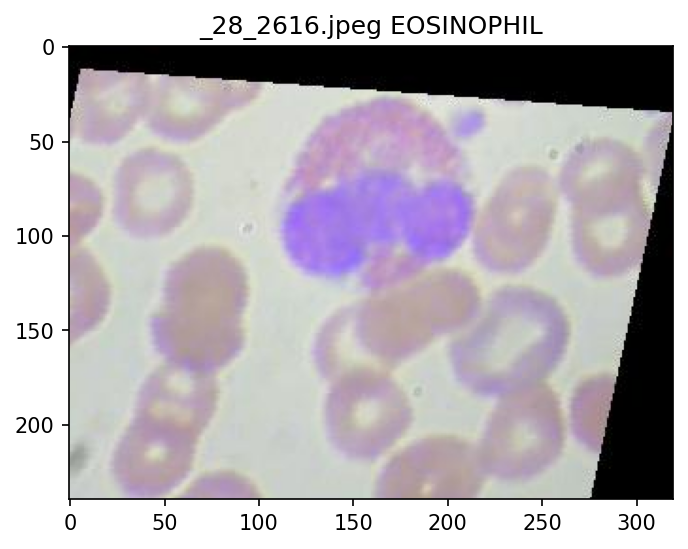

[[[6 0 0]
  [4 0 0]
  [4 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[6 0 0]
  [4 0 0]
  [3 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[4 0 0]
  [3 0 0]
  [3 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[3 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [36]:
img = 0
plt.imshow(img_array[img], cmap='gray')
plt.grid(False)
plt.title(img_id[img] + ' ' + img_label[img])
plt.show()

print(img_array[img][:5])

In [10]:
# HOLDING FOR QUESTIONS
# GOAL IS TO SAVE TO CSV AND LOAD FROM CSV

# Zip together the image details
# data_zip = list(zip(img_id, img_array, img_label))

# Create DataFrame from the zip
# train_df = pd.DataFrame(data_zip, columns = ["img_id", "img_array", "img_label"])


# Save Dataframe as CSV to google drive for loading
# train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Springboard - Capstone 3/train_df.csv')


# train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Springboard - Capstone 3/train_df.csv')

In [28]:
# Test Data
# Train Data
test_img_id = []
test_img_array = []
test_img_label = []

# Folders also represent the cell type catagory
for folder in cellTypes:
  dir = os.path.join(Test_datadir, folder)
  for img in os.listdir(dir):
    img_path = os.path.join(dir, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    
    test_img_id.append(img)
    test_img_array.append(img_arr)
    test_img_label.append(folder)

In [29]:
print(len(test_img_id))
print(len(test_img_array))
print(len(test_img_label))

2487
2487
2487


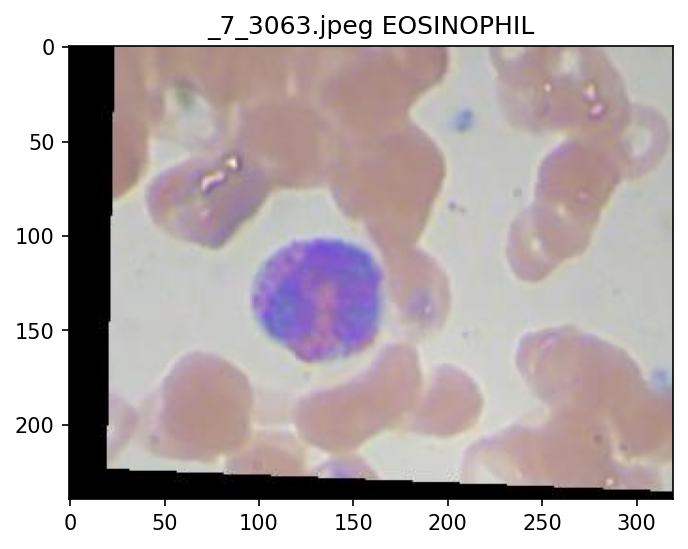

_7_3063.jpeg
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [185 188 179]
  [184 187 176]
  [183 186 175]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [185 188 179]
  [185 188 177]
  [184 187 176]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [185 188 179]
  [186 189 178]
  [186 189 178]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [185 188 179]
  [186 189 178]
  [188 191 180]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [185 188 179]
  [187 190 181]
  [188 191 182]]]
EOSINOPHIL


In [34]:
img = 0
plt.imshow(test_img_array[img], cmap='gray')
plt.grid(False)
plt.title(test_img_id[img] + ' ' + test_img_label[img])
plt.show()

print(test_img_array[img][:5])

# EDA on Train Data

In [11]:
print("EOSINOPHIL Len:", len(os.listdir('../content/BloodCellData/Data/Train/EOSINOPHIL')))
print("LYMPHOCYTE Len:", len(os.listdir('../content/BloodCellData/Data/Train/LYMPHOCYTE')))
print("MONOCYTE Len:", len(os.listdir('../content/BloodCellData/Data/Train/MONOCYTE')))
print("NEUTROPHIL Len:", len(os.listdir('../content/BloodCellData/Data/Train/NEUTROPHIL')))

EOSINOPHIL Len: 2497
LYMPHOCYTE Len: 2483
MONOCYTE Len: 2478
NEUTROPHIL Len: 2499


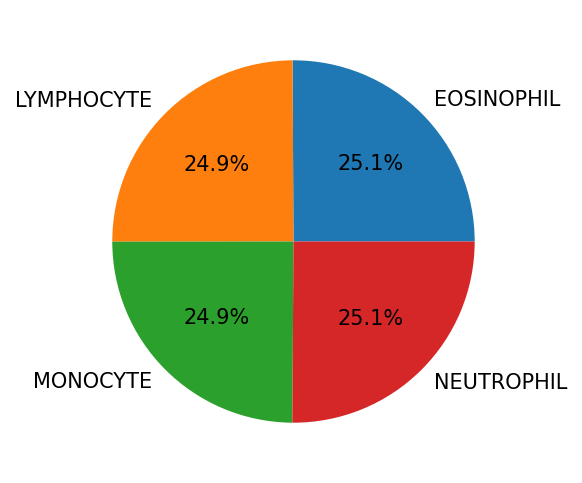

In [27]:
image_counts = [2497, 2483, 2478, 2499]
image_cellType = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

plt.pie(image_counts, labels=image_cellType, autopct='%1.1f%%')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [12]:
EOSINOPHIL_imgs = range(0,2497)
LYMPHOCYTE_imgs = range(2497,4980)
MONOCYTE_imgs = range(4980,7458)
NEUTROPHIL_imgs = range(7458,9957)

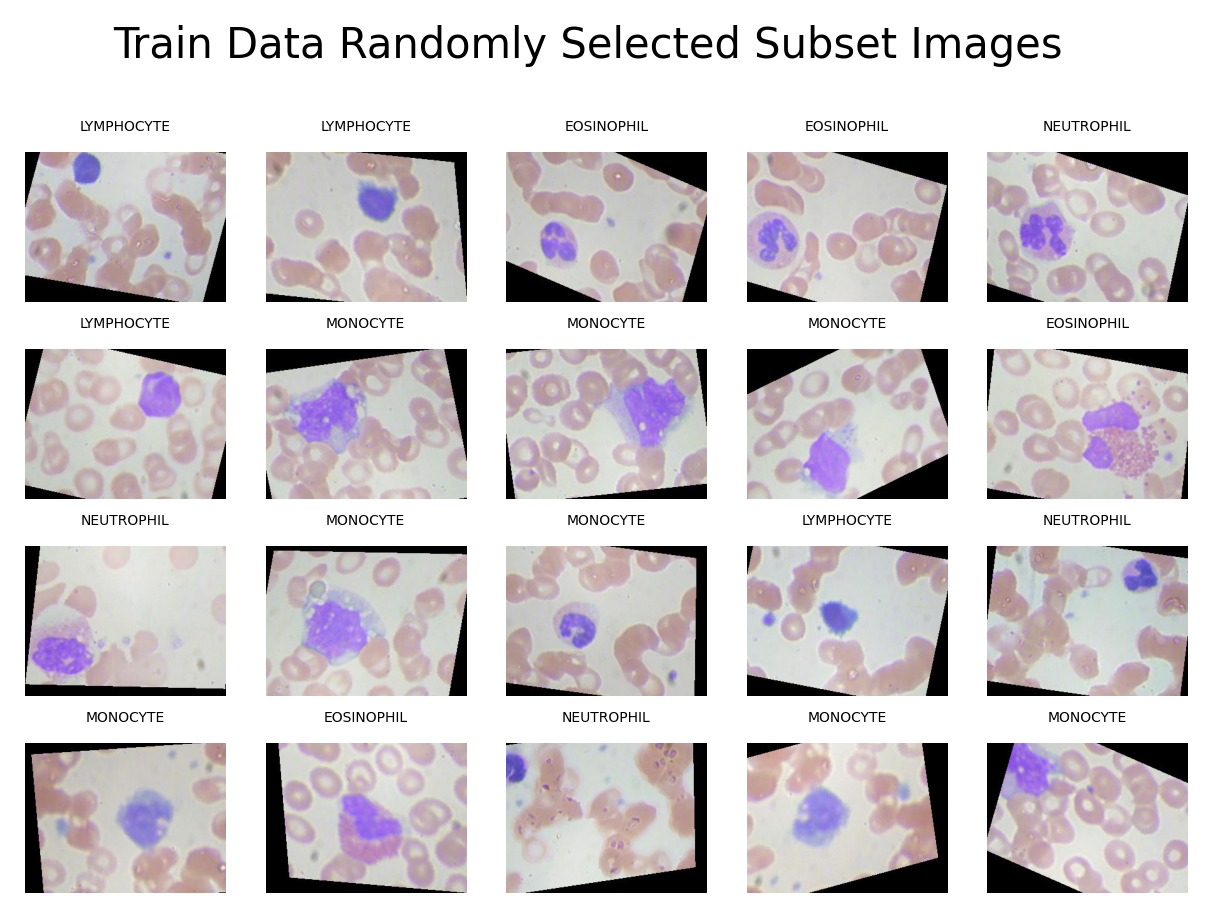

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=5)
plt.rcParams['figure.dpi'] = 200

# Randomly select 5 images from each cellType and plot it in subplot
for i in range(4):
  for j in range(5):
    randimg = random.randint(0, len(img_array))
    ax[i,j].imshow(img_array[randimg], cmap='gray')
    ax[i,j].set_title(img_label[randimg], fontsize=4)
    ax[i,j].axis('off')

fig.suptitle("Train Data Randomly Selected Subset Images", y=1)
plt.show()

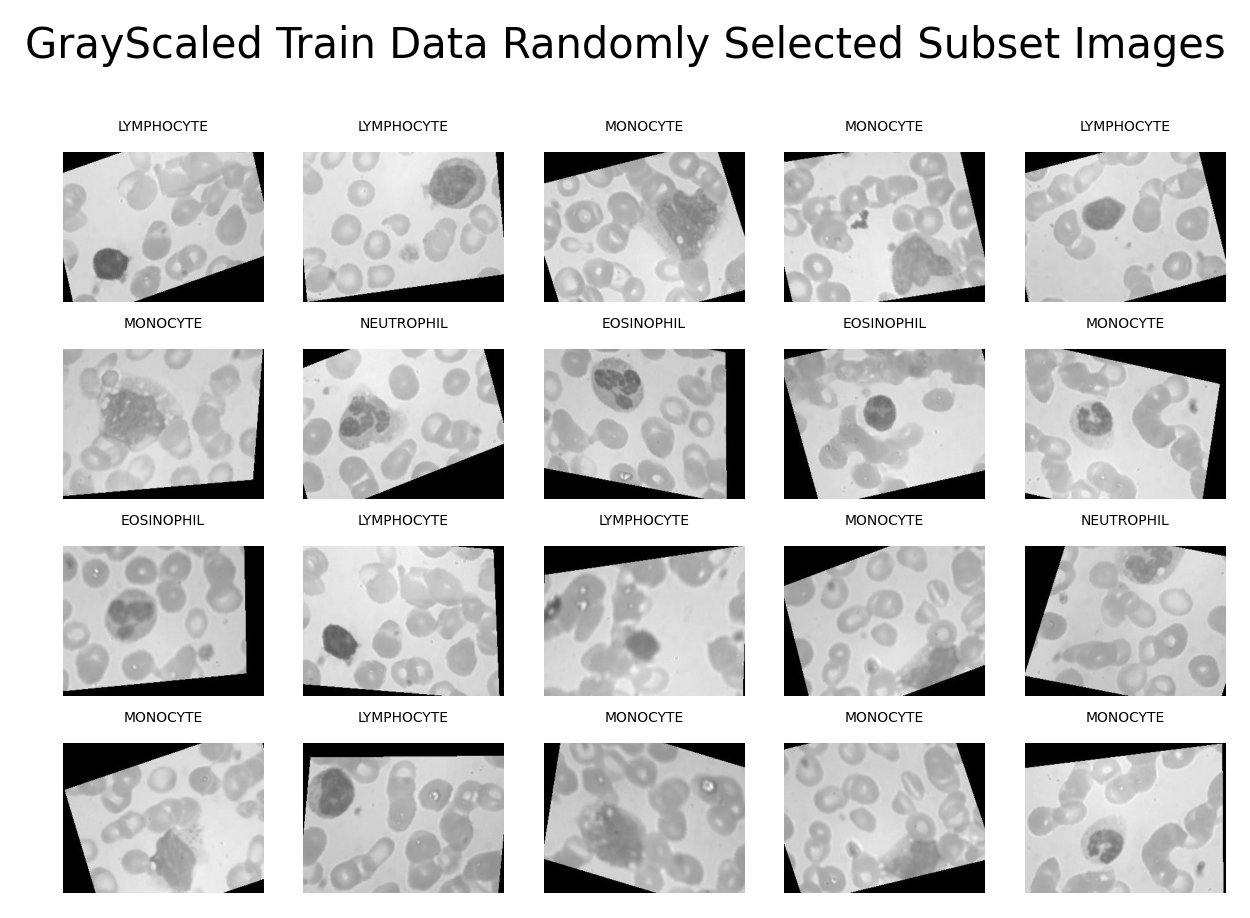

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=5)
plt.rcParams['figure.dpi'] = 250

for i in range(4):
  for j in range(5):
    randimg = random.randint(0, len(img_array))
    gray = cv2.cvtColor(img_array[randimg], cv2.COLOR_RGB2GRAY)
    test = ax[i,j].imshow(gray, cmap='gray')
    ax[i,j].set_title(img_label[randimg], fontsize=4)
    ax[i,j].axis('off')

fig.suptitle("GrayScaled Train Data Randomly Selected Subset Images", y=1)
plt.show()

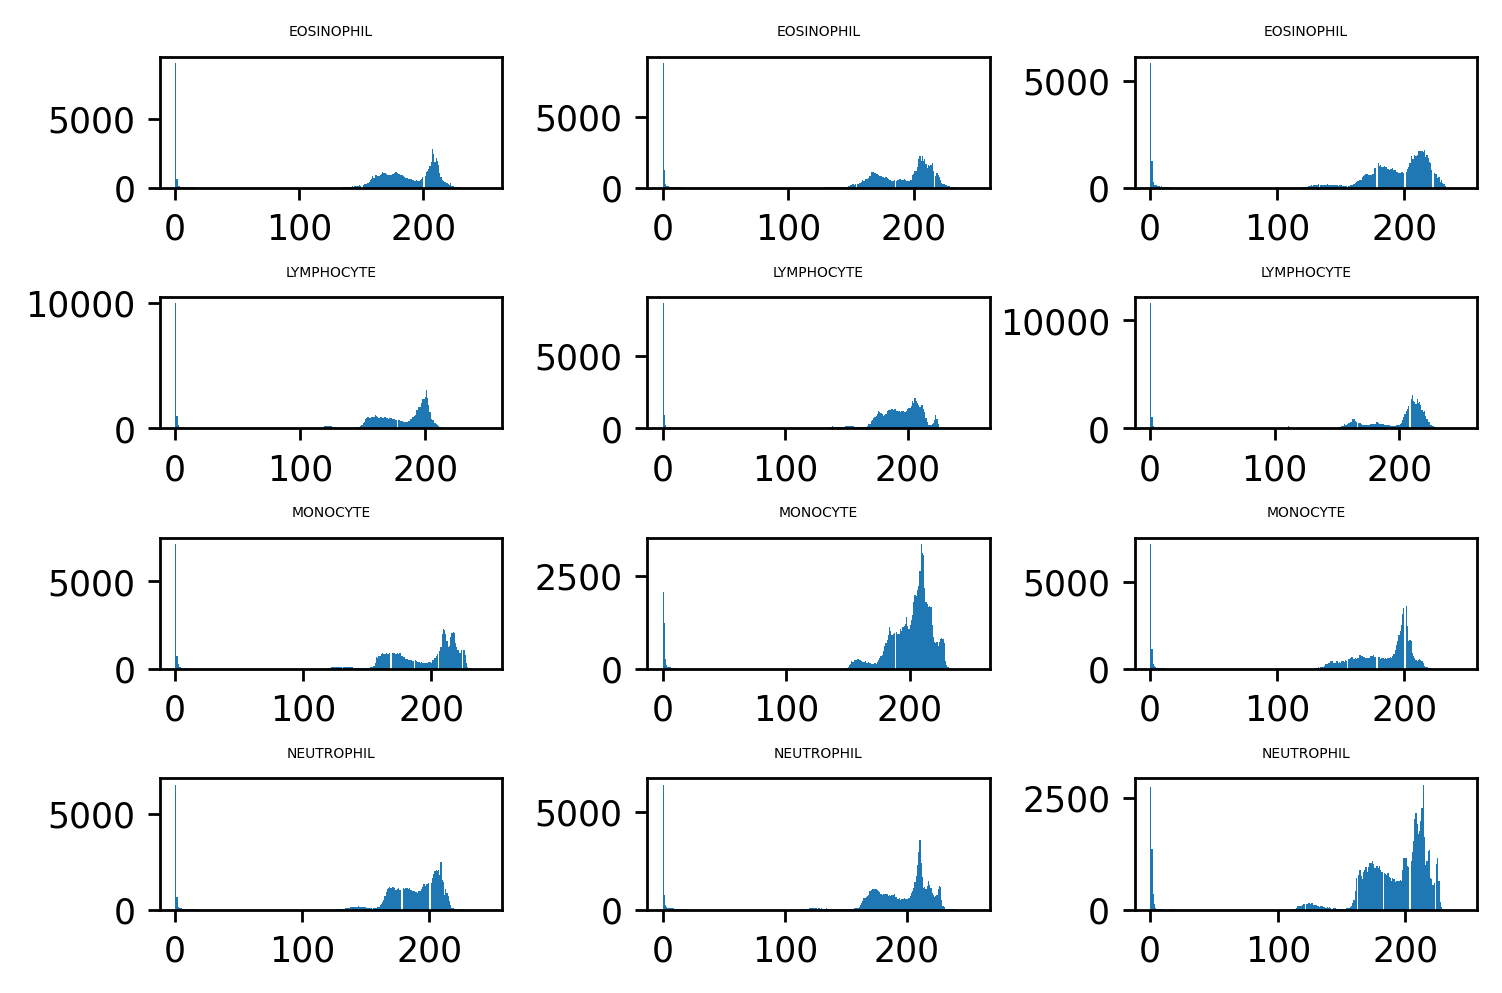

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=3)
plt.rcParams['figure.dpi'] = 250
plt.tight_layout()

eso_samples = random.sample(EOSINOPHIL_imgs, 3)
lym_samples = random.sample(LYMPHOCYTE_imgs, 3)
mono_samples = random.sample(MONOCYTE_imgs, 3)
neut_samples = random.sample(NEUTROPHIL_imgs, 3)

sampleList = [eso_samples, lym_samples, mono_samples, neut_samples]

for i, sample in enumerate(sampleList):
  for j, sampleItem in enumerate(sample):
    gray = cv2.cvtColor(img_array[sampleItem], cv2.COLOR_RGB2GRAY)
    ax[i,j].hist(gray.ravel(), bins=256)
    ax[i,j].set_title(img_label[sampleItem], fontsize=4)

plt.show()

The bin at and around the 0 pixel mark are the black pixels in all of the images. The bins with high counts towards the higher end of the pixel intensity are the unstained red blood cells. The binning can be rescaled to focus around the pixel intensity of the stain which is around: 

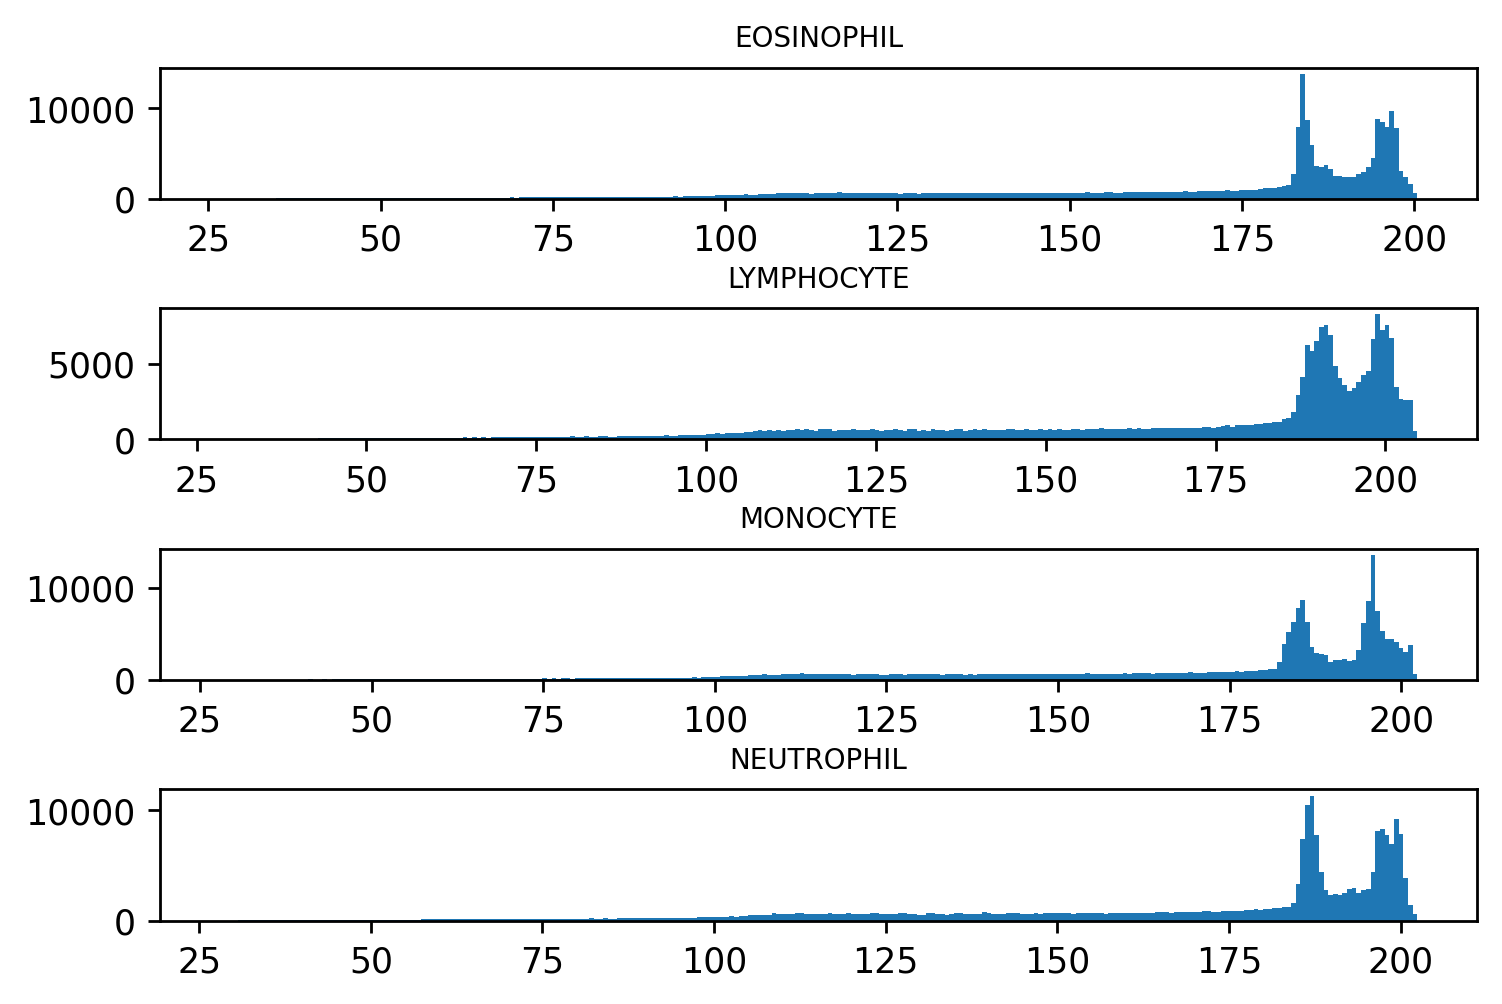

In [16]:
fig, ax = plt.subplots(nrows=4, ncols=1)
plt.rcParams['figure.dpi'] = 250
plt.tight_layout()

cellImages = [("EOSINOPHIL", EOSINOPHIL_imgs), ("LYMPHOCYTE", LYMPHOCYTE_imgs), ("MONOCYTE", MONOCYTE_imgs), ("NEUTROPHIL", NEUTROPHIL_imgs)]

for i, cellType in enumerate(cellImages):
  cellMin = min(cellType[1])
  cellMax = max(cellType[1])
  averageArray = np.mean(img_array[cellMin:cellMax], axis=0)
  ax[i].hist(averageArray.ravel(), bins=256)
  ax[i].set_title(cellType[0], fontsize=8)

plt.show()

After averaging all of the pixel values for each cell type and plotting them on a histogram, they appear to all have similar shapes. High 0 pixel bin spike has been visually eliminated since it was only a small part of the whole picture. What all of the images have in common is the two bi-modal peaks at ~180 and ~200. Thresholding investigation shows that the ~180 are the unstained red blood cells, while the ~200 is the empty spaces between the cells.

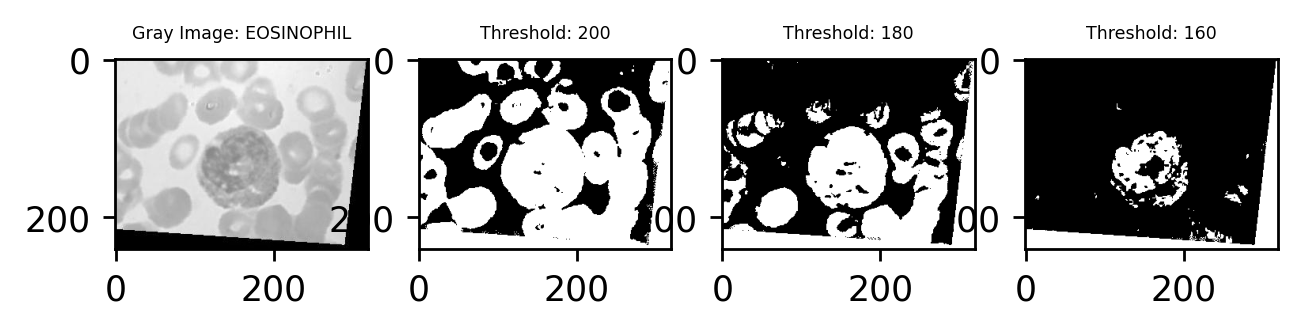

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=4)

# Image Example
img = 250
gray = cv2.cvtColor(img_array[img], cv2.COLOR_RGB2GRAY)

ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Gray Image: " + img_label[img], fontsize=5)

binary_threshold = gray < 200
ax[1].imshow(binary_threshold, cmap='gray')
ax[1].set_title("Threshold: 200", fontsize=5)

binary_threshold = gray < 180
ax[2].imshow(binary_threshold, cmap='gray')
ax[2].set_title("Threshold: 180", fontsize=5)

binary_threshold = gray < 160
ax[3].imshow(binary_threshold, cmap='gray')
ax[3].set_title("Threshold: 160", fontsize=5)

plt.show()

Using an EOSINOPHIL image as an example to examine the pixel values shown in the average histograms, a threshold at 200 shows all the black are the empty spaces that are not either white or red blood cells. As the threshold is decreased to 180, more of the red blood cells become included into black areas. When the threshold is set to 160, everything but the stained white blood cell is colored in black. This means that the important pixel values that is the stain for the white blood cell lie less than 160 pixel values. But also need to remember that the pixel value is  greater than 50, to exclude the black out of frame pixels that are due to the picture augmentation. 

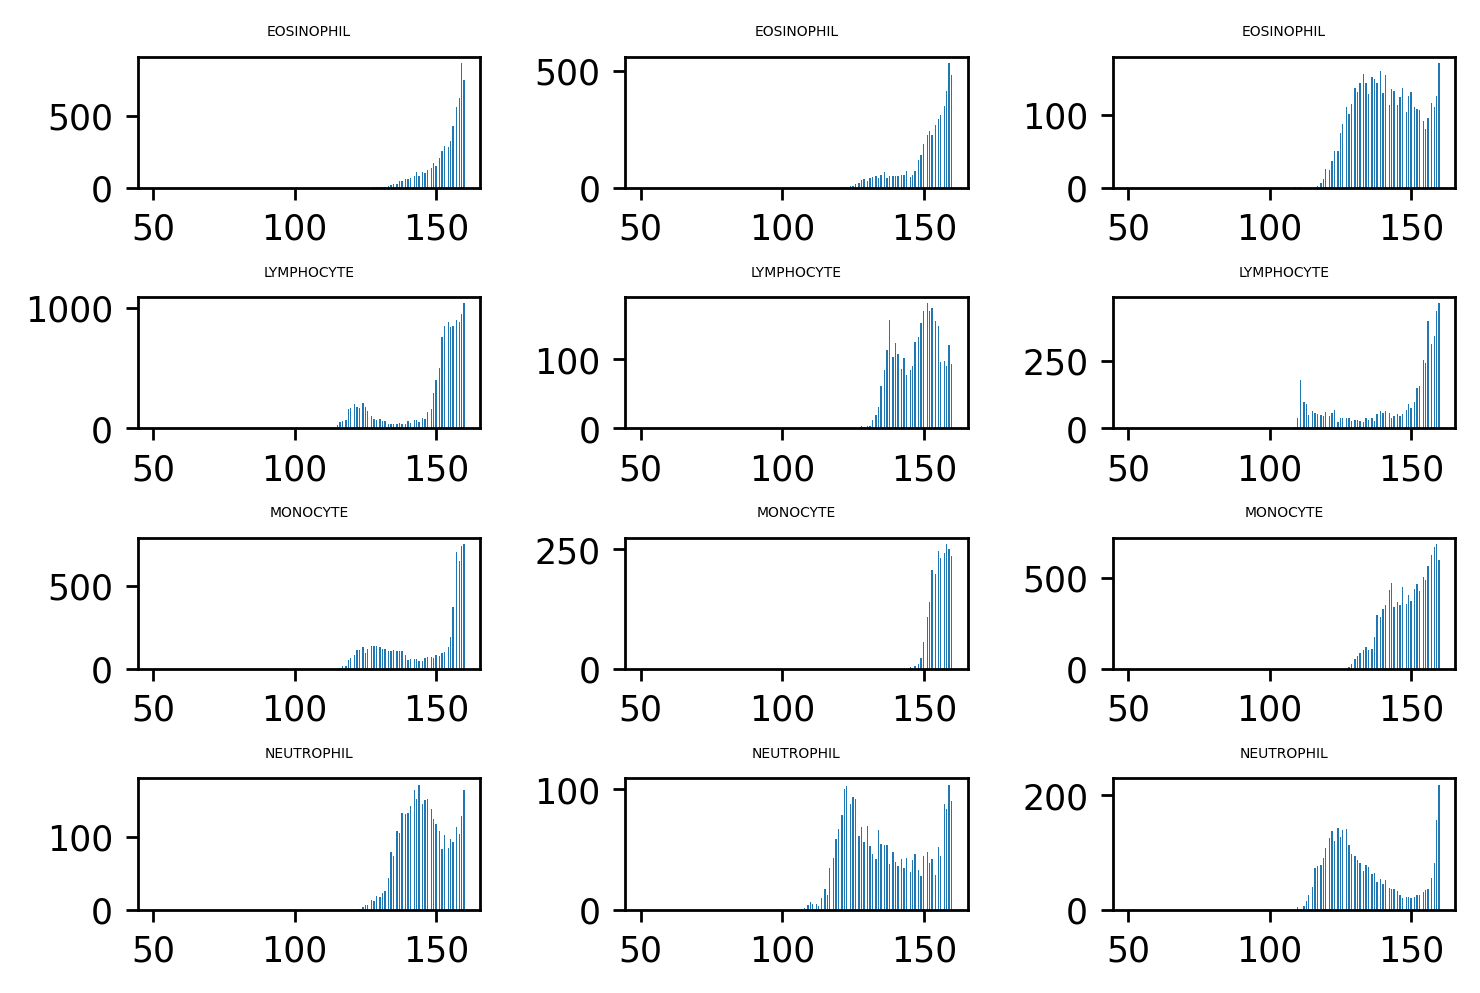

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=3)
plt.rcParams['figure.dpi'] = 250
plt.tight_layout()

sampleList = [eso_samples, lym_samples, mono_samples, neut_samples]

for i, sample in enumerate(sampleList):
  for j, sampleItem in enumerate(sample):
    gray = cv2.cvtColor(img_array[sampleItem], cv2.COLOR_RGB2GRAY)
    ax[i,j].hist(gray.ravel(), bins=256, range=[50, 160])
    ax[i,j].set_title(img_label[sampleItem], fontsize=4)

plt.show()

Histogram shows the import pixcel values after thresholding investigation showed that the important stained pixels are between 50 and up to ~160.

In [19]:
# Test Image
img = 250
gray = cv2.cvtColor(img_array[img], cv2.COLOR_RGB2GRAY)

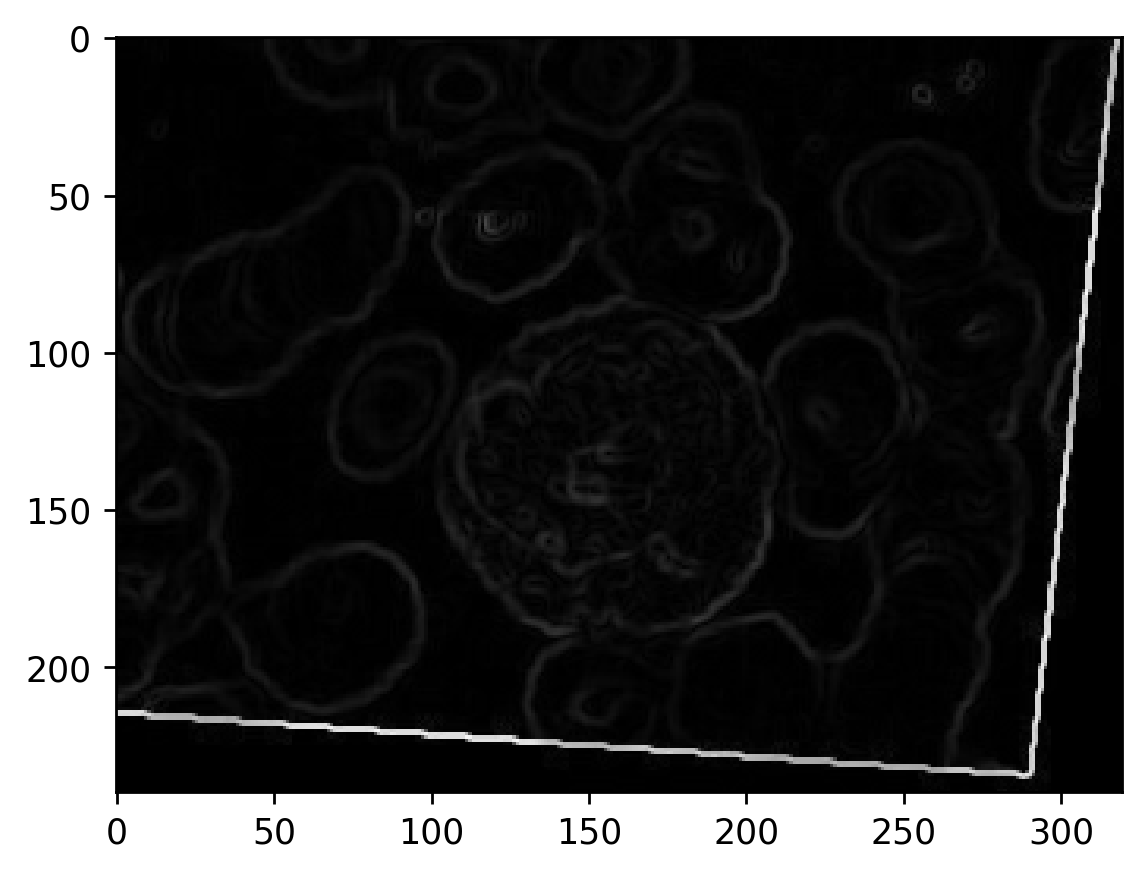

In [20]:
from skimage.filters import sobel

edge_sobel = sobel(gray)

plt.imshow(edge_sobel, cmap='gray')
plt.show()


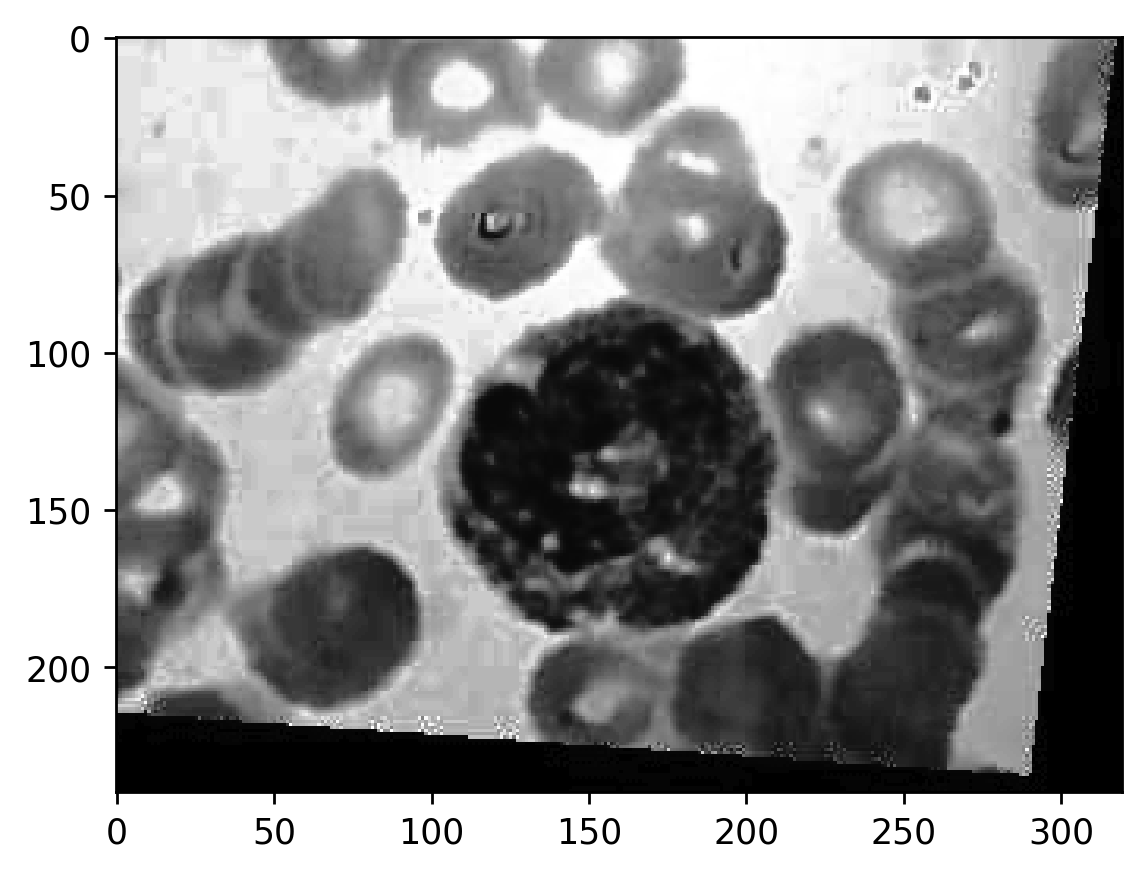

In [21]:
from skimage import exposure

gray_equal = exposure.equalize_hist(gray)

plt.imshow(gray_equal, cmap='gray')
plt.show()